In [86]:
from regime_ml.features.common.transforms import TransformRegistry
from regime_ml.data.common.loaders import load_dataframe
from regime_ml.utils.config import load_configs

cfg = load_configs()
regime_cfg = cfg["macro_data"]["regime_universe"]
processed_path = cfg["macro_data"]["regime_universe"]["processed_path"]
raw_features_path = cfg["macro_data"]["regime_universe"]["raw_features_path"]
ready_features_path = cfg["macro_data"]["regime_universe"]["ready_features_path"]
series_config = cfg["macro_data"]["regime_universe"]["series"]

In [89]:
df_raw = load_dataframe(raw_features_path)
df_ready = load_dataframe(ready_features_path)

In [90]:
import plotly.express as px
import plotly.graph_objects as go
import nbformat
import pandas as pd

df_na_raw = pd.DataFrame(data=df_raw.isna().sum(axis=1), columns=["na_count_raw"]) # type: ignore
df_na_ready = pd.DataFrame(data=df_ready.isna().sum(axis=1), columns=["na_count_ready"]) # type: ignore

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_na_raw.index, y=df_na_raw["na_count_raw"], mode="lines"))
fig.add_trace(go.Scatter(x=df_na_ready.index, y=df_na_ready["na_count_ready"], mode="lines"))
fig.update_layout(title="Number of NA values per day",
                  xaxis_title="Date",
                  yaxis_title="Number of NA values")
fig.show()


In [91]:
px.line(df_ready)

In [57]:
df_processed = load_dataframe(processed_path)
df_processed[(df_processed.series_code == "CFNAI")]

date series_code  value                          series_name  \
0    2000-01-07       CFNAI   0.15  chicago_fed_national_activity_index   
1    2000-01-10       CFNAI   0.15  chicago_fed_national_activity_index   
2    2000-01-11       CFNAI   0.15  chicago_fed_national_activity_index   
3    2000-01-12       CFNAI   0.15  chicago_fed_national_activity_index   
4    2000-01-13       CFNAI   0.15  chicago_fed_national_activity_index   
...         ...         ...    ...                                  ...   
6520 2026-01-09       CFNAI  -0.31  chicago_fed_national_activity_index   
6521 2026-01-12       CFNAI  -0.31  chicago_fed_national_activity_index   
6522 2026-01-13       CFNAI  -0.31  chicago_fed_national_activity_index   
6523 2026-01-14       CFNAI  -0.31  chicago_fed_national_activity_index   
6524 2026-01-15       CFNAI  -0.31  chicago_fed_national_activity_index   

     category is_new_data native_freq  obs_number  days_since_update  
0      growth        None     monthly         1.0                4.0  
1      growth        None     monthly         1.0                7.0  
2      growth        None     monthly         1.0                8.0  
3      growth        None     monthly         1.0                9.0  
4      growth        None     monthly         1.0               10.0  
...       ...         ...         ...         ...                ...  
6520   growth        None     monthly       308.0              161.0  
6521   growth        None     monthly       308.0              164.0  
6522   growth        None     monthly       308.0              165.0  
6523   growth        None     monthly       308.0              166.0  
6524   growth        None     monthly       308.0              167.0  

[6525 rows x 9 columns]

<Axes: >

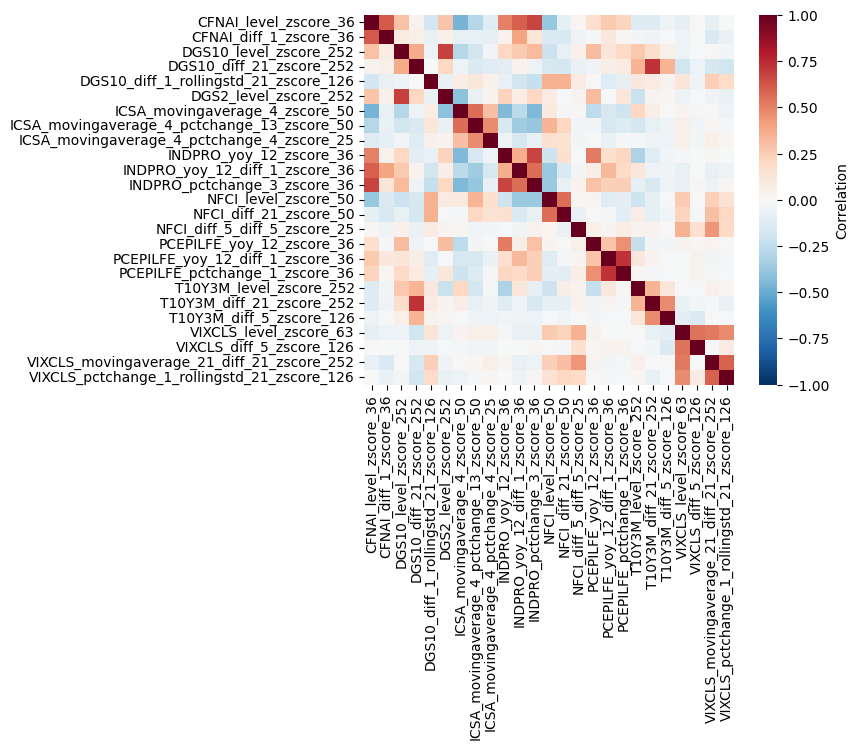

In [76]:
import seaborn as sns
df_feat = load_dataframe(features_path)
corr_matrix = df_feat.corr()
sns.heatmap(corr_matrix, 
            cmap='RdBu_r', 
            center=0, 
            vmin=-1, vmax=1,
            square=True,
            cbar_kws={'label': 'Correlation'})

In [79]:
threshold = 0.70

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append({
                'feature_1': corr_matrix.columns[i],
                'feature_2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', 
                                                          key=abs, 
                                                          ascending=False)
high_corr_df

feature_1                       feature_2  \
0          DGS10_diff_21_zscore_252       T10Y3M_diff_21_zscore_252   
1  PCEPILFE_yoy_12_diff_1_zscore_36  PCEPILFE_pctchange_1_zscore_36   

   correlation  
0     0.726510  
1     0.726292

In [78]:
df_feat.columns

Index(['CFNAI_level_zscore_36', 'CFNAI_diff_1_zscore_36',
       'DGS10_level_zscore_252', 'DGS10_diff_21_zscore_252',
       'DGS10_diff_1_rollingstd_21_zscore_126', 'DGS2_level_zscore_252',
       'ICSA_movingaverage_4_zscore_50',
       'ICSA_movingaverage_4_pctchange_13_zscore_50',
       'ICSA_movingaverage_4_pctchange_4_zscore_25', 'INDPRO_yoy_12_zscore_36',
       'INDPRO_yoy_12_diff_1_zscore_36', 'INDPRO_pctchange_3_zscore_36',
       'NFCI_level_zscore_50', 'NFCI_diff_21_zscore_50',
       'NFCI_diff_5_diff_5_zscore_25', 'PCEPILFE_yoy_12_zscore_36',
       'PCEPILFE_yoy_12_diff_1_zscore_36', 'PCEPILFE_pctchange_1_zscore_36',
       'T10Y3M_level_zscore_252', 'T10Y3M_diff_21_zscore_252',
       'T10Y3M_diff_5_zscore_126', 'VIXCLS_level_zscore_63',
       'VIXCLS_diff_5_zscore_126',
       'VIXCLS_movingaverage_21_diff_21_zscore_252',
       'VIXCLS_pctchange_1_rollingstd_21_zscore_126'],
      dtype='object')

In [80]:
from sklearn.ensemble import RandomForestClassifier
features = load_dataframe(features_path)

In [83]:
features.dropna(inplace=True)
features

CFNAI_level_zscore_36  CFNAI_diff_1_zscore_36  \
date                                                        
2004-09-01               0.670846               -0.353879   
2004-09-02               0.670846               -0.353879   
2004-09-03               0.670846               -0.353879   
2004-09-07               0.670846               -0.353879   
2004-09-08               0.670846               -0.353879   
...                           ...                     ...   
2026-01-09              -0.659302               -0.521301   
2026-01-12              -0.659302               -0.521301   
2026-01-13              -0.659302               -0.521301   
2026-01-14              -0.659302               -0.521301   
2026-01-15              -0.659302               -0.521301   

            DGS10_level_zscore_252  DGS10_diff_21_zscore_252  \
date                                                           
2004-09-01               -0.783545                 -1.522767   
2004-09-02               -0.505218                 -1.016797   
2004-09-03               -0.108906                 -0.654019   
2004-09-07               -0.267180                 -0.680249   
2004-09-08               -0.581311                 -0.860984   
...                            ...                       ...   
2026-01-09               -0.651820                  0.066605   
2026-01-12               -0.591691                  0.409308   
2026-01-13               -0.642354                  0.292310   
2026-01-14               -0.802717                 -0.167126   
2026-01-15               -0.685750                  0.007300   

            DGS10_diff_1_rollingstd_21_zscore_126  DGS2_level_zscore_252  \
date                                                                       
2004-09-01                              -1.178577               0.931447   
2004-09-02                              -1.094348               1.047965   
2004-09-03                              -0.390812               1.410699   
2004-09-07                              -0.354045               1.325242   
2004-09-08                              -0.099148               1.116748   
...                                           ...                    ...   
2026-01-09                              -1.852276              -1.140217   
2026-01-12                              -2.147786              -1.140217   
2026-01-13                              -2.083307              -1.165987   
2026-01-14                              -2.251240              -1.226355   
2026-01-15                              -2.148109              -1.042276   

            ICSA_movingaverage_4_zscore_50  \
date                                         
2004-09-01                       -0.983241   
2004-09-02                       -0.983241   
2004-09-03                       -0.983241   
2004-09-07                       -0.983241   
2004-09-08                       -0.983241   
...                                    ...   
2026-01-09                       -1.711126   
2026-01-12                       -2.305041   
2026-01-13                       -2.305041   
2026-01-14                       -2.305041   
2026-01-15                       -2.305041   

            ICSA_movingaverage_4_pctchange_13_zscore_50  \
date                                                      
2004-09-01                                     1.754872   
2004-09-02                                     1.754872   
2004-09-03                                     1.754872   
2004-09-07                                     1.754872   
2004-09-08                                     1.754872   
...                                                 ...   
2026-01-09                                    -1.758988   
2026-01-12                                    -1.693705   
2026-01-13                                    -1.693705   
2026-01-14                                    -1.693705   
2026-01-15                                    -1.693705   

            ICSA_movingaverag

In [84]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

features_clean = features['2004-09-01':].dropna()

# Test each feature for stationarity
stationarity_results = []
for col in features_clean.columns:
    adf_result = adfuller(features_clean[col], autolag='AIC')
    stationarity_results.append({
        'feature': col,
        'adf_statistic': adf_result[0],
        'p_value': adf_result[1],
        'stationary': adf_result[1] < 0.05  # p < 0.05 = stationary
    })

stationarity_df = pd.DataFrame(stationarity_results)
print(f"Stationary features: {stationarity_df['stationary'].sum()} / {len(stationarity_df)}")
print("\nNon-stationary features:")
print(stationarity_df[~stationarity_df['stationary']])

Stationary features: 24 / 25

Non-stationary features:
                   feature  adf_statistic   p_value  stationary
9  INDPRO_yoy_12_zscore_36       -2.51091  0.112842       False


In [92]:
for col in features_clean.columns:
    print(col)

CFNAI_level_zscore_36
CFNAI_diff_1_zscore_36
DGS10_level_zscore_252
DGS10_diff_21_zscore_252
DGS10_diff_1_rollingstd_21_zscore_126
DGS2_level_zscore_252
ICSA_movingaverage_4_zscore_50
ICSA_movingaverage_4_pctchange_13_zscore_50
ICSA_movingaverage_4_pctchange_4_zscore_25
INDPRO_yoy_12_zscore_36
INDPRO_yoy_12_diff_1_zscore_36
INDPRO_pctchange_3_zscore_36
NFCI_level_zscore_50
NFCI_diff_21_zscore_50
NFCI_diff_5_diff_5_zscore_25
PCEPILFE_yoy_12_zscore_36
PCEPILFE_yoy_12_diff_1_zscore_36
PCEPILFE_pctchange_1_zscore_36
T10Y3M_level_zscore_252
T10Y3M_diff_21_zscore_252
T10Y3M_diff_5_zscore_126
VIXCLS_level_zscore_63
VIXCLS_diff_5_zscore_126
VIXCLS_movingaverage_21_diff_21_zscore_252
VIXCLS_pctchange_1_rollingstd_21_zscore_126
